In [17]:
include("Box_Dirichlet_To_Neumann.jl")

Generate_Output (generic function with 1 method)

# Generate Neumman results for box setup

The top Dirichlet boundary is 
$$u_f(x) = \sum_{l=1}^{N_l}  \frac{\xi_l}{\pi^2 l^2} sin(\pi l x)$$

Assume the wave speed is a constant, give several wave speeds in the array cs
Consider the Dirichlet boundary $u(x) = u_f(x)$ on the top, and $u(x) = 0$ in all 
other boundaries.
The ouput is a $N_p \times N_cN_l \times 4$ tensor, Neumann results on four boundaries.
$N_p$ is the number of points on each edge.

Since the equation is linear, the inputs used to are $\{\frac{1}{\pi^2 l^2} sin(\pi l x))\}_l$.
```
output_data = Generate_Output(cs, N_l, ne, porder)
```

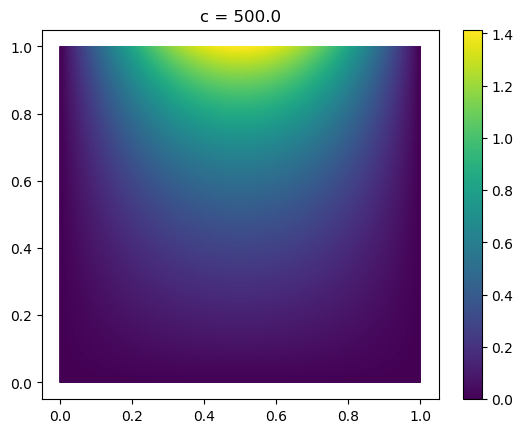

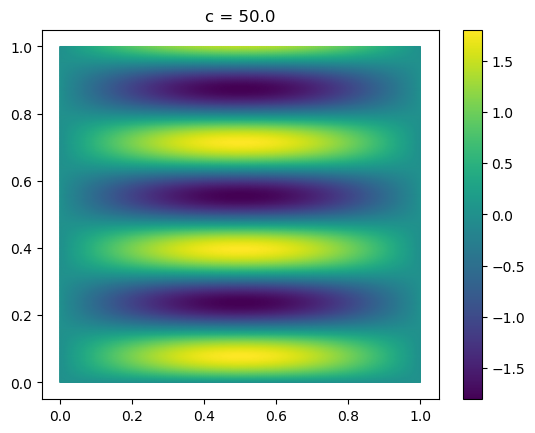

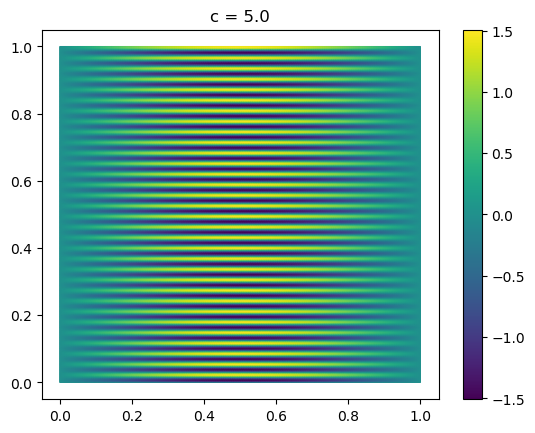

In [38]:

N_l = 20
ne = 200
porder = 2
cs = [500.0;50.0;5.0]

# generate Dirichlet to Neumman results output for differe
output_data = Generate_Output(cs, N_l, ne, porder);



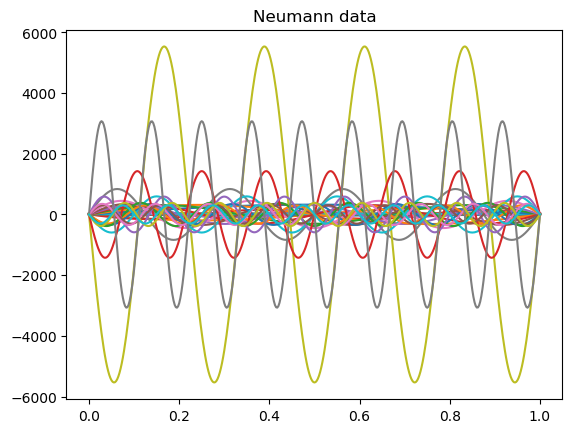

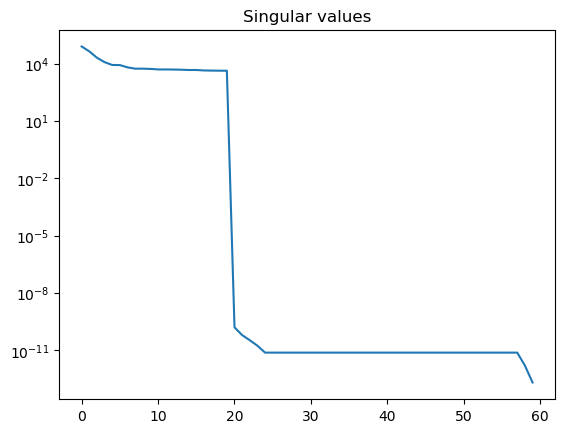

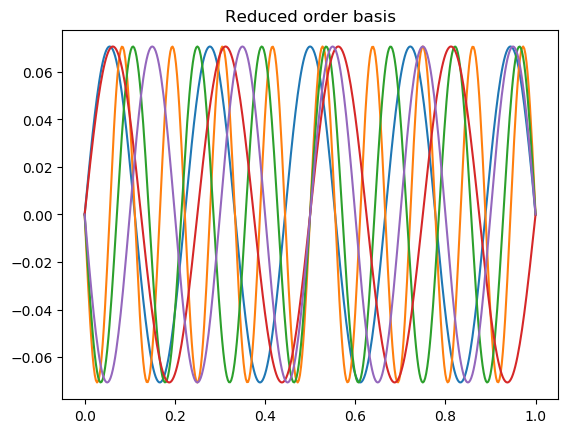

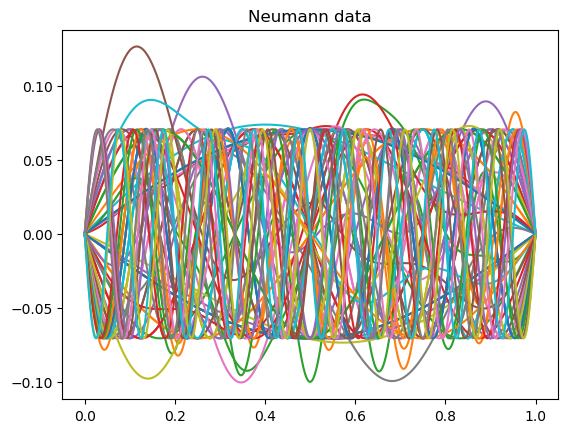

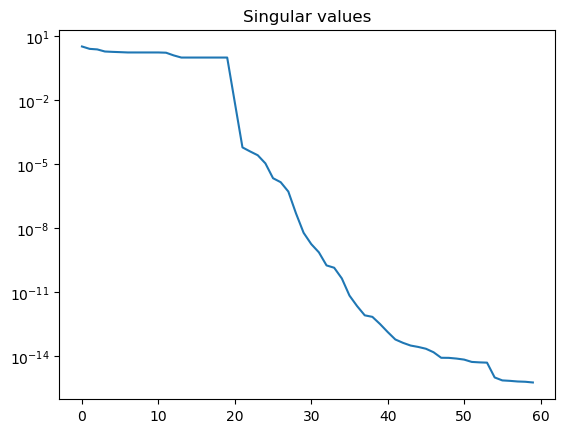

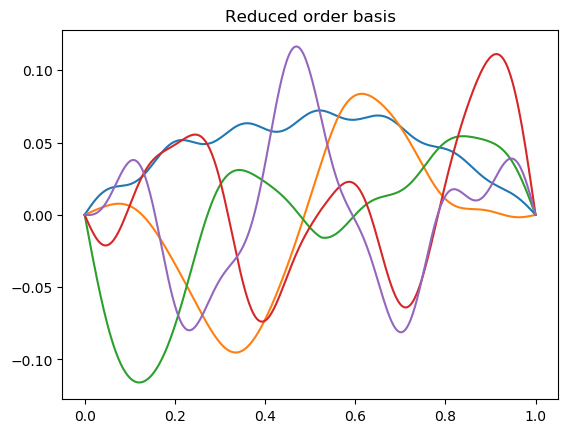

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5cef9a650>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5591af610>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5591af7d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5591af990>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5591afb50>

In [45]:
# consider on only the top edge
bc_id = 1
x = LinRange(0, 1, ne*porder+1)
PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data[:,:,bc_id])


PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
trunc = 5
PyPlot.title("Reduced order basis")
PyPlot.plot(x, U[:, 1:trunc])

# normalized the ouput
output_data_normalized = copy(output_data)
for i = 1:size(output_data, 2)
    for j = 1:size(output_data, 3)
        output_data_normalized[:,i,j] .= output_data_normalized[:,i,j]/norm(output_data_normalized[:,i,j])
    end
end

PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data_normalized[:,:,bc_id])

PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data_normalized[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
PyPlot.title("Reduced order basis")
trunc = 5
PyPlot.plot(x, U[:, 1:trunc])

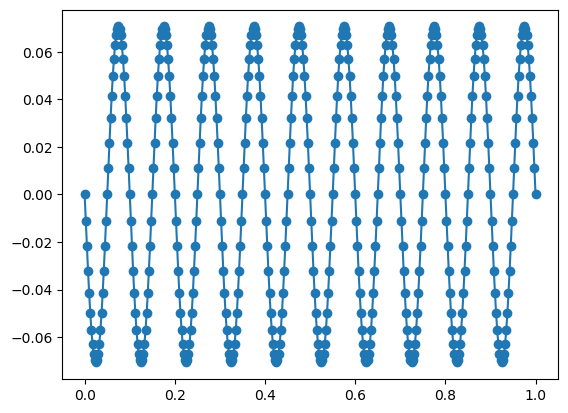

1.0

In [40]:
PyPlot.plot(x, output_data_normalized[:,end,1], "-o")   
    norm(output_data_normalized[:,end,1])